In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

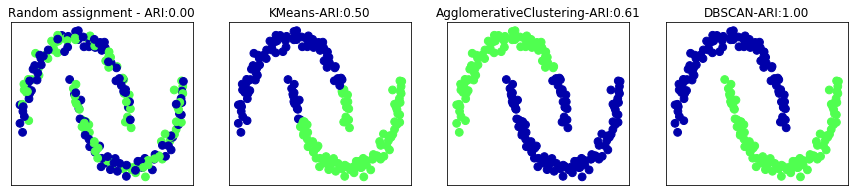

In [8]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

X,y = make_moons(n_samples=200,noise=0.05,random_state=0)

#データを平均0、分散を1にスケール変換する
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig,axes = plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(),'yticks':()})

#利用するアルゴリズムのリストを作る
algorithm = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]

#参照のためにランダムなクラスタ割当を作る
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2,size=len(X))

#ランダムな割当をプロット
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)
axes[0].set_title("Random assignment - ARI:{:.2f}".format(adjusted_rand_score(y,random_clusters)))

for ax,algorithm in zip(axes[1:],algorithm):
    #クラスタ割当とクラスタセンタをプロット
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{}-ARI:{:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y,clusters)))

In [9]:
from sklearn.metrics import accuracy_score

#この２つのラベルは同じクラスタリングをしている
clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]
#精度はゼロになる。ラベルは全く一致していないからだ
print(accuracy_score(clusters1,clusters2))
#ARIスコアは1になる。クラスタリングは同じだから
print(adjusted_rand_score(clusters1,clusters2))

0.0
1.0
